In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,matthews_corrcoef,classification_report,roc_curve

In [4]:
train = pd.read_csv('X:/Insurance_Churn_ParticipantsData/Insurance_Churn_ParticipantsData/Train.csv')
test = pd.read_csv('X:\Insurance_Churn_ParticipantsData\Insurance_Churn_ParticipantsData/Test.csv')

In [5]:
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0


In [6]:
test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.571051,0.406843,0.984523,0.011016,-0.569351,-0.411453,-0.251940,0,1,1,0,0,0,0,11,3
1,-1.124080,-0.166935,0.503892,-0.322932,0.721811,0.547323,0.182198,0,2,1,0,0,0,0,5,1
2,0.476877,0.145079,-0.577529,-0.691828,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,1,3
3,1.606965,-0.447419,1.825628,-0.983062,7.177616,-0.411453,-0.251940,1,1,0,0,1,0,0,5,3
4,-0.935732,-0.364653,-1.178318,-0.322932,0.076230,-0.411453,-0.251940,8,2,1,0,1,0,2,8,3


In [7]:
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000
mean,-0.004158,0.002584,-0.000213,-0.000053,-0.000298,-0.004652,-0.007498,4.336381,1.171051,1.225345,0.018137,0.555503,0.159667,0.639407,5.520497,2.562375,0.116993
std,0.999776,1.014268,1.000872,1.002512,1.003724,0.993984,0.802696,3.273376,0.606730,0.749104,0.133450,0.496917,0.366303,0.897627,3.003241,0.987148,0.321417
min,-2.159994,-3.081149,-1.779108,-1.002478,-0.569351,-0.411453,-0.251940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.747384,-0.422787,-0.938003,-0.602517,-0.569351,-0.411453,-0.251940,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000
50%,-0.182341,-0.297324,0.023260,-0.303517,-0.246560,-0.411453,-0.251940,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,0.665225,0.022901,0.624050,0.236237,0.076230,-0.411453,-0.251940,7.000000,2.000000,2.000000,0.000000,1.000000,0.000000,2.000000,8.000000,3.000000,0.000000
max,5.091402,33.094776,1.825628,18.094700,19.443647,8.127648,23.625644,11.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [8]:
plt.figure(figsize =(16,6))

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [9]:
train.isnull().any().sum()

0

In [10]:
train['labels'].describe()

count    33908.000000
mean         0.116993
std          0.321417
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: labels, dtype: float64

In [11]:
train.shape

(33908, 17)

In [12]:
all = train.shape[0]
cust_leave = train[train['labels'] == 1]
cust_stay = train[train["labels"] == 0]

x= len(cust_leave)/all
y = len(cust_stay)/all

print('Cust_leaving = ',x*100,'%')
print('Cust_staying = ',y*100,'%')

Cust_leaving =  11.69930399905627 %
Cust_staying =  88.30069600094373 %


Text(0, 0.5, 'Frequency')

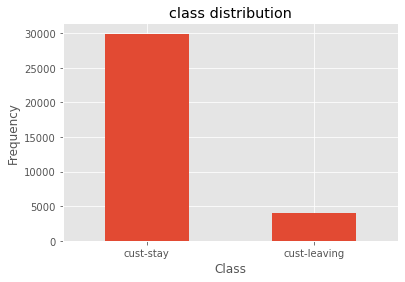

In [14]:
labels = ['cust-stay','cust-leaving']
classes = pd.value_counts(train['labels'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

C:\Users\LENOVO\Anaconda31\lib\site-packages\numpy\lib\histograms.py:778: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

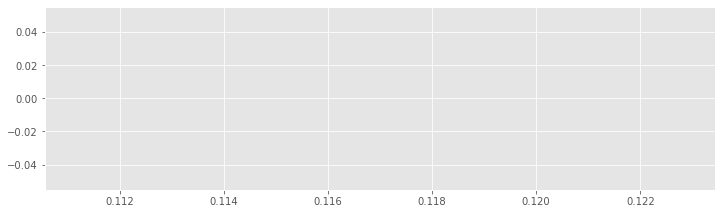

In [54]:
af = train.iloc[:,1:16].columns

plt.figure(figsize = (12,15*4))
gs = gridspec.GridSpec(15,1)
for i,cn in enumerate(train[af]):
    ax = plt.subplot(gs[i])
    sns.distplot(train.labels == 1,bins = 50)
    sns.distplot(train[cn],[train.labels == 0],bins = 50)
    ax.set_xlabel(' ')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [38]:
train[cn]

0       -0.424429
1        0.150991
2       -0.173832
3       -0.381404
4        1.590527
           ...   
33903   -0.248387
33904   -0.433625
33905   -0.395526
33906    0.789143
33907   -0.406365
Name: feature_1, Length: 33908, dtype: float64

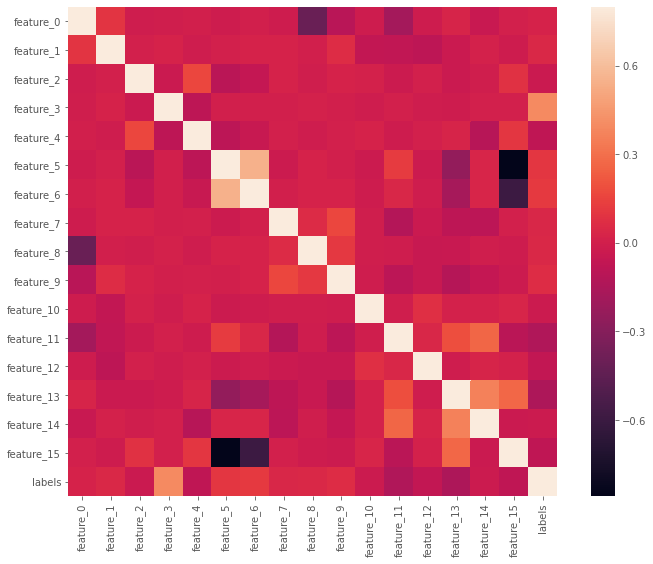

In [59]:
correlation_matrix = train.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,square=True,vmax=0.8)
plt.show()

In [60]:
train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,3,0,1,0,0,0,0,10,2,1
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,4,1,2,0,1,0,0,0,3,0
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,6,1,2,0,0,0,0,5,3,0
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,4,0,2,0,1,0,0,5,3,0
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,1,1,0,0,0,0,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,1.701139,-0.248387,-0.457371,-0.792789,-0.569351,4.851829,0.616335,5,0,0,0,0,0,2,10,0,0
33904,1.512791,-0.433625,-1.298476,-0.823854,-0.569351,-0.411453,-0.251940,10,1,2,0,0,0,2,8,3,0
33905,0.006007,-0.395526,0.984523,-0.555919,-0.246560,-0.411453,-0.251940,0,1,1,0,1,0,0,7,3,0
33906,-0.088167,0.789143,0.503892,-0.664647,-0.246560,-0.411453,-0.251940,1,1,1,0,1,0,0,9,3,0


In [64]:
train['Sfeature_7'] = StandardScaler().fit_transform(train['feature_7'].values.reshape(-1,1)) 

C:\Users\LENOVO\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [67]:
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,labels,Sfeature_7
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,0,1,0,0,0,0,10,2,1,-0.408264
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,1,2,0,1,0,0,0,3,0,-0.102764
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,1,2,0,0,0,0,5,3,0,0.508235
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,0,2,0,1,0,0,5,3,0,-0.102764
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,1,1,0,0,0,0,8,3,0,-1.324762


In [68]:
train['Sfeature_8'] = StandardScaler().fit_transform(train['feature_8'].values.reshape(-1,1))
train['Sfeature_9'] = StandardScaler().fit_transform(train['feature_9'].values.reshape(-1,1)) 
train['Sfeature_10'] = StandardScaler().fit_transform(train['feature_10'].values.reshape(-1,1)) 
train['Sfeature_11'] = StandardScaler().fit_transform(train['feature_11'].values.reshape(-1,1)) 
train['Sfeature_12'] = StandardScaler().fit_transform(train['feature_12'].values.reshape(-1,1)) 
train['Sfeature_13'] = StandardScaler().fit_transform(train['feature_13'].values.reshape(-1,1)) 
train['Sfeature_14'] = StandardScaler().fit_transform(train['feature_14'].values.reshape(-1,1))
train['Sfeature_15'] = StandardScaler().fit_transform(train['feature_15'].values.reshape(-1,1)) 

C:\Users\LENOVO\Anaconda31\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [70]:
train = train.drop(['feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15'],axis=1)

In [72]:
train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,labels,Sfeature_7,Sfeature_8,Sfeature_9,Sfeature_10,Sfeature_11,Sfeature_12,Sfeature_13,Sfeature_14,Sfeature_15
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,1,-0.408264,-1.930130,-0.300824,-0.135913,-1.117915,-0.435896,-0.712341,1.491578,-0.569705
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,0,-0.102764,-0.281927,1.034124,-0.135913,0.894522,-0.435896,-0.712341,-1.838207,0.443329
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,0,0.508235,-0.281927,1.034124,-0.135913,-1.117915,-0.435896,-0.712341,-0.173314,0.443329
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,0,-0.102764,-1.930130,1.034124,-0.135913,0.894522,-0.435896,-0.712341,-0.173314,0.443329
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,0,-1.324762,-0.281927,-0.300824,-0.135913,-1.117915,-0.435896,-0.712341,0.825621,0.443329


In [73]:
X = train.drop(['labels'],axis=1)
y = train['labels']

In [74]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,Sfeature_7,Sfeature_8,Sfeature_9,Sfeature_10,Sfeature_11,Sfeature_12,Sfeature_13,Sfeature_14,Sfeature_15
0,-0.276515,-0.424429,1.344997,-0.012283,0.076230,1.076648,0.182198,-0.408264,-1.930130,-0.300824,-0.135913,-1.117915,-0.435896,-0.712341,1.491578,-0.569705
1,0.853573,0.150991,0.503892,-0.979179,-0.569351,-0.411453,-0.251940,-0.102764,-0.281927,1.034124,-0.135913,0.894522,-0.435896,-0.712341,-1.838207,0.443329
2,0.947747,-0.173832,1.825628,-0.703478,0.076230,-0.411453,-0.251940,0.508235,-0.281927,1.034124,-0.135913,-1.117915,-0.435896,-0.712341,-0.173314,0.443329
3,0.853573,-0.381404,0.984523,-0.039464,-0.569351,-0.411453,-0.251940,-0.102764,-1.930130,1.034124,-0.135913,0.894522,-0.435896,-0.712341,-0.173314,0.443329
4,1.324443,1.590527,-1.178318,-0.097711,-0.246560,-0.411453,-0.251940,-1.324762,-0.281927,-0.300824,-0.135913,-1.117915,-0.435896,-0.712341,0.825621,0.443329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33903,1.701139,-0.248387,-0.457371,-0.792789,-0.569351,4.851829,0.616335,0.202735,-1.930130,-1.635772,-0.135913,-1.117915,-0.435896,1.515789,1.491578,-2.595772
33904,1.512791,-0.433625,-1.298476,-0.823854,-0.569351,-0.411453,-0.251940,1.730233,-0.281927,1.034124,-0.135913,-1.117915,-0.435896,1.515789,0.825621,0.443329
33905,0.006007,-0.395526,0.984523,-0.555919,-0.246560,-0.411453,-0.251940,-1.324762,-0.281927,-0.300824,-0.135913,0.894522,-0.435896,-0.712341,0.492643,0.443329
33906,-0.088167,0.789143,0.503892,-0.664647,-0.246560,-0.411453,-0.251940,-1.019263,-0.281927,-0.300824,-0.135913,0.894522,-0.435896,-0.712341,1.158600,0.443329


In [76]:
Y = pd.DataFrame(y)

In [77]:
Y

,labels
0,1
1,0
2,0
3,0
4,0
...,...
33903,0
33904,0
33905,0
33906,0


In [88]:
pca = PCA(n_components=2)
principalcomponents = pca.fit_transform(X.values)
principalDF = pd.DataFrame(data = principalcomponents,columns=['Pricipal_Component_1','Pricipal_Component_2'])
finalDF = pd.concat([principalDF,Y],axis=1)

In [89]:
finalDF.head()

,Pricipal_Component_1,Pricipal_Component_2,labels
0,0.925729,-0.243928,1
1,-0.291835,1.302756,0
2,-0.689974,1.798832,0
3,-0.446001,0.269161,0
4,-0.372315,0.170434,0


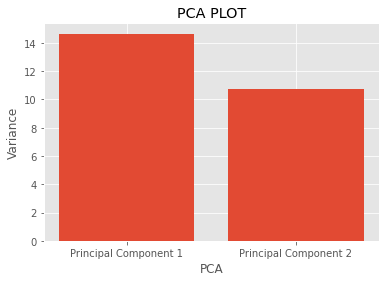

In [90]:
percent_variance = np.round(pca.explained_variance_ratio_*100,decimals=2)
columns = ['Principal Component 1','Principal Component 2']
plt.bar(x= range(1,3),height=percent_variance,tick_label = columns)
plt.xlabel('PCA')
plt.ylabel('Variance')
plt.title('PCA PLOT')
plt.show()


Text(0.5, 1.0, 'PC1 VS PC2')

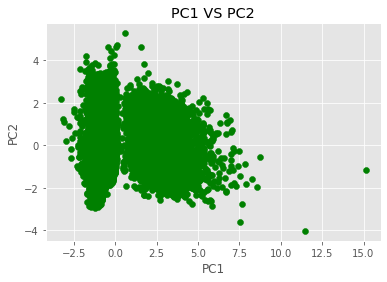

In [115]:
plt.scatter(principalDF.Pricipal_Component_1,principalDF.Pricipal_Component_2,c=['g'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 VS PC2')

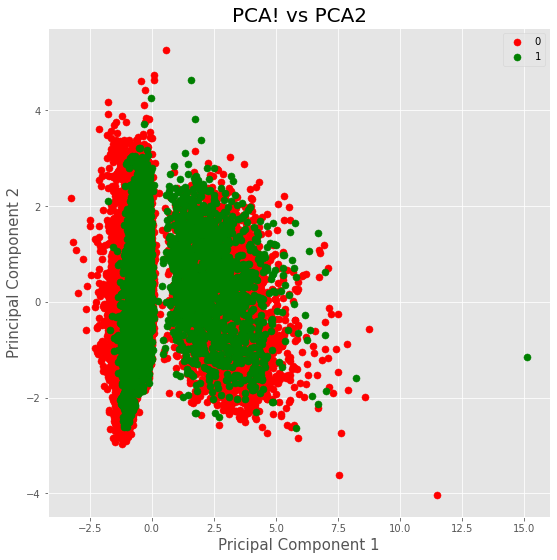

In [120]:
fig = plt.figure(figsize= (9,9))
ax=fig.add_subplot()
ax.set_xlabel('Pricipal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('PCA! vs PCA2',fontsize=20)
targets = [0,1]
colors = ['r','g']
for target,color in zip(targets,colors):
    indicesToKeep = finalDF['labels'] == target
    ax.scatter(finalDF.loc[indicesToKeep,'Pricipal_Component_1']
               ,finalDF.loc[indicesToKeep,'Pricipal_Component_2']
               ,c = color,s=50)
    ax.legend(targets)
    ax.grid()

Text(0, 0.5, 'Frequency')

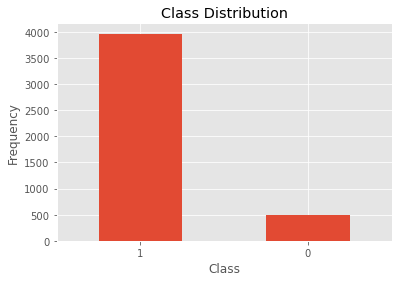

In [126]:
train = train.sample(frac = 1)
cust_leave = train[train['labels'] == 1]
cust_stay = train[train['labels'] == 0][:500]

new_train = pd.concat([cust_leave,cust_stay])
new_train = new_train.sample(frac=1,random_state = 42)

labels = [cust_leave,cust_stay]
classes = pd.value_counts(new_train['labels'],sort=True)
classes.plot(kind = 'bar',rot = 0)
plt.title('Class Distribution')
plt.xlabel("Class")
plt.ylabel("Frequency")
# plt.xticks(labels,range(0))

In [135]:
features = new_train.drop(['labels'],axis=1)
labels = pd.DataFrame(new_train['labels'])

feature_array = features.values
label_array = labels.values

In [140]:
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size = 0.20)

In [142]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [148]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree',n_jobs=-1)
    knn.fit(X_train,y_train.ravel())
    train_accuracy[i] = knn.score(X_train,y_train.ravel())
    test_accuracy[i] = knn.score(X_test,y_test.ravel())

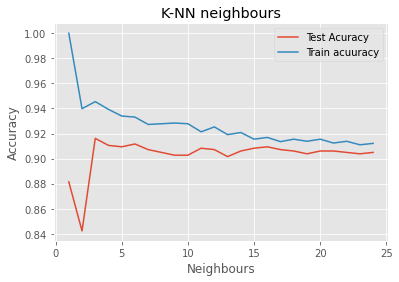

In [149]:
plt.title('K-NN neighbours')
plt.plot(neighbours,test_accuracy,label = 'Test Acuracy')
plt.plot(neighbours,train_accuracy,label = 'Train acuuracy')
plt.legend()
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
plt.show()

In [150]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [154]:
knn = KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [156]:
filename = 'finlized_model.sav'
joblib.dump(knn,filename)

['finlized_model.sav']

In [157]:
knn = joblib.load(filename)

In [158]:
knn_pred_test_labels = knn.predict(X_test)

Text(0.5, 1.0, 'No of blobs')

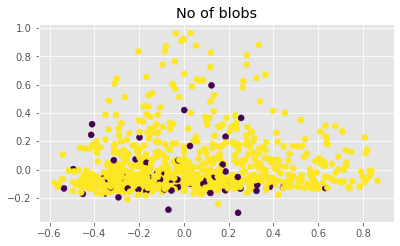

In [159]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
plt.subplot(222)
plt.scatter(X_test[:,0],X_test[:,1], c=knn_pred_test_labels)
plt.title("No of blobs")

In [163]:
acc_score = accuracy_score(y_test,knn_pred_test_labels)
prec_score = precision_score(y_test,knn_pred_test_labels)
recall_score = recall_score(y_test,knn_pred_test_labels)
f1_score = f1_score(y_test,knn_pred_test_labels)
mcc = matthews_corrcoef(y_test,knn_pred_test_labels)

TypeError: 'numpy.float64' object is not callable

In [176]:
print(acc_score ,'\n' ,prec_score,'\n' ,recall_score,'\n' ,f1_score,'\n' ,mcc)

0.9161073825503355 
 0.9337349397590361 
 0.9748427672955975 
 0.9538461538461538 
 0.5103683627803149


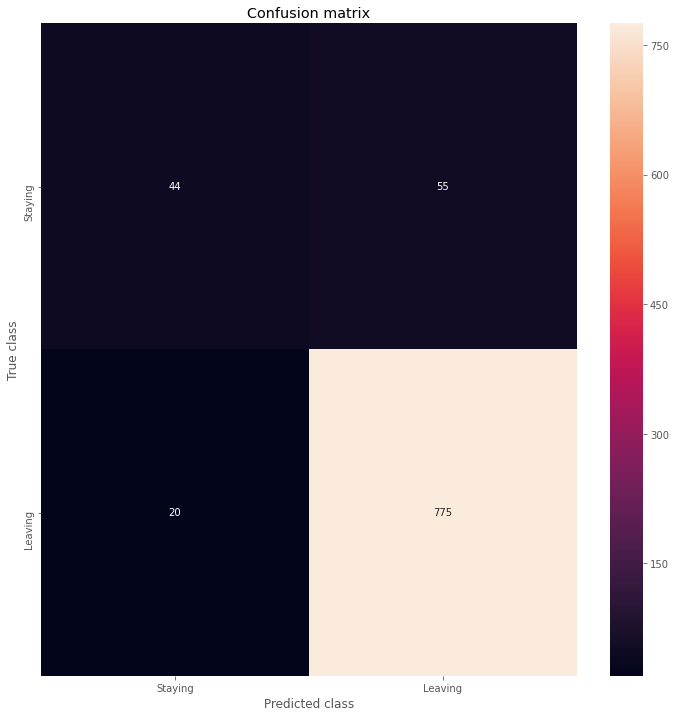

In [179]:
import seaborn as sns
LABELS = ['Staying', 'Leaving']
conf_matrix = confusion_matrix(y_test, knn_pred_test_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [198]:
y_test =labelss

NameError: name 'labelss' is not defined

In [184]:
final = pd.DataFrame(data = y_test)

In [193]:
final.rename(index={'0':'labels'},inplace=True)

In [194]:
print(final.columns)

Int64Index([0], dtype='int64')


In [199]:
final

,0
0,0
1,1
2,1
3,1
4,1
...,...
889,1
890,1
891,1
892,1


In [200]:
final.columns = ['labels']

In [201]:
final

,labels
0,0
1,1
2,1
3,1
4,1
...,...
889,1
890,1
891,1
892,1


In [202]:
final.to_excel(r'X:\Insurance_Churn_ParticipantsData\Submission.xlsx',index=None,header=True)